<a href="https://colab.research.google.com/github/RishitaChawla19/Intro_to_ML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Housing.csv"
data = pd.read_csv(file_path) # Use pd.read_csv to read a CSV file
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Convert categorical variables to binary (yes/no -> 1/0)
bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[bool_cols] = data[bool_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# Drop the 'furnishingstatus' column for now (optional if not used in 1.b)
data.drop(columns=['furnishingstatus'], inplace=True)

<ipython-input-5-998254c15288>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[bool_cols] = data[bool_cols].applymap(lambda x: 1 if x == 'yes' else 0)


In [ ]:
def prepare_data(features):
    X = data[features].values
    y = data['price'].values.reshape(-1, 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Add intercept (bias) term
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

    return X_train, X_val, y_train, y_val

In [ ]:

def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X.T.dot(errors))
        cost_history[i] = computeCost(X, y, theta)

    return theta, cost_history


In [ ]:
def run_linear_regression(features, alpha=0.05, iterations=1000):
    X_train, X_val, y_train, y_val = prepare_data(features)
    theta = np.zeros((X_train.shape[1], 1))

    theta, train_costs = gradientDescent(X_train, y_train, theta, alpha, iterations)
    val_costs = [computeCost(X_val, y_val, theta) for _ in range(iterations)]

    # Plot losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_costs, label='Training Loss (MSE)')
    plt.plot(range(iterations), val_costs, label='Validation Loss (MSE)', linestyle='dashed')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Gradient Descent - alpha={alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Final theta values:\n", theta)


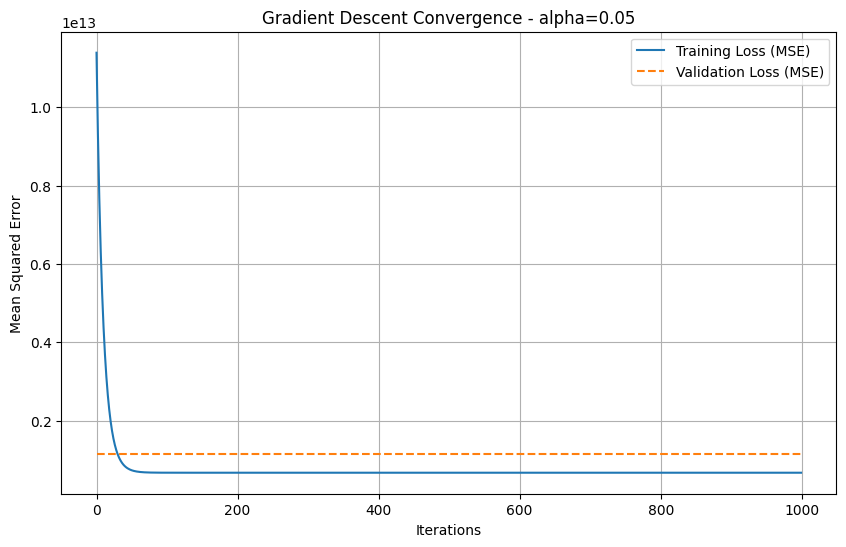

Final theta values:
 [[4706527.38532109]
 [ 680058.42414123]
 [ 112973.18562915]
 [ 565408.61793598]
 [ 424354.81176349]
 [ 288348.7726677 ]]


In [ ]:
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
run_linear_regression(features_1a, alpha=0.05, iterations=1000)

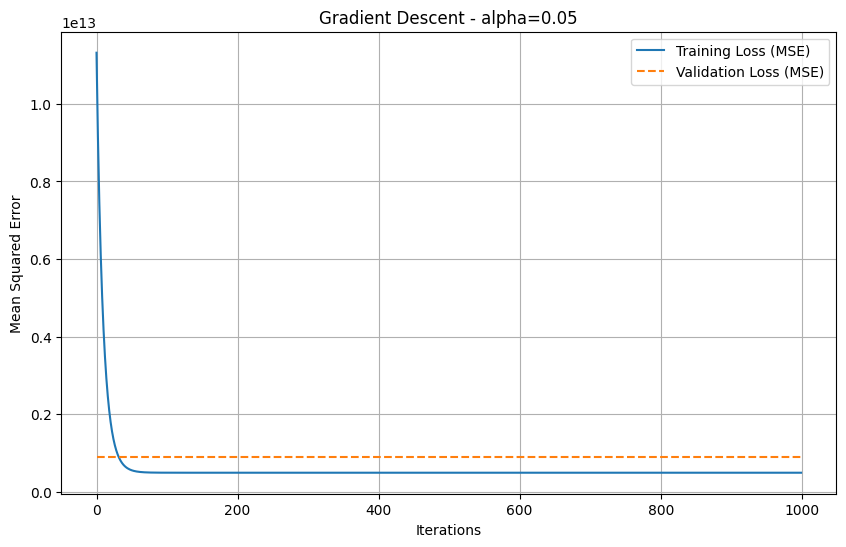

Final theta values:
 [[4706527.38532109]
 [ 523387.27546186]
 [  58623.06248702]
 [ 528975.10760569]
 [ 365907.58037646]
 [ 144130.60782295]
 [  93366.50482472]
 [ 208520.89028154]
 [ 155907.28691422]
 [ 372995.82854493]
 [ 211306.48839064]
 [ 269576.16564874]]


In [ ]:
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'parking', 'prefarea']
run_linear_regression(features_1b, alpha=0.05, iterations=1000)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_and_prepare(X_raw, y_raw, method="standardization"):
    if method == "normalization":
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X_raw)
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_raw, test_size=0.2, random_state=42)
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

    return X_train, X_val, y_train, y_val


In [ ]:
def train_with_scaling(X_raw, y_raw, alpha=0.05, iterations=1000, method="standardization", title=""):
    X_train, X_val, y_train, y_val = scale_and_prepare(X_raw, y_raw, method)
    theta = np.zeros((X_train.shape[1], 1))
    theta, train_loss = gradientDescent(X_train, y_train, theta, alpha, iterations)
    val_loss = [computeCost(X_val, y_val, theta)] * iterations

    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_loss, label="Training Loss (MSE)")
    plt.plot(range(iterations), val_loss, label="Validation Loss (MSE)", linestyle='dashed')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title(f'{title} - {method.capitalize()}')
    plt.legend()
    plt.grid()
    plt.show()

    final_train_loss = computeCost(X_train, y_train, theta)
    return theta, final_train_loss



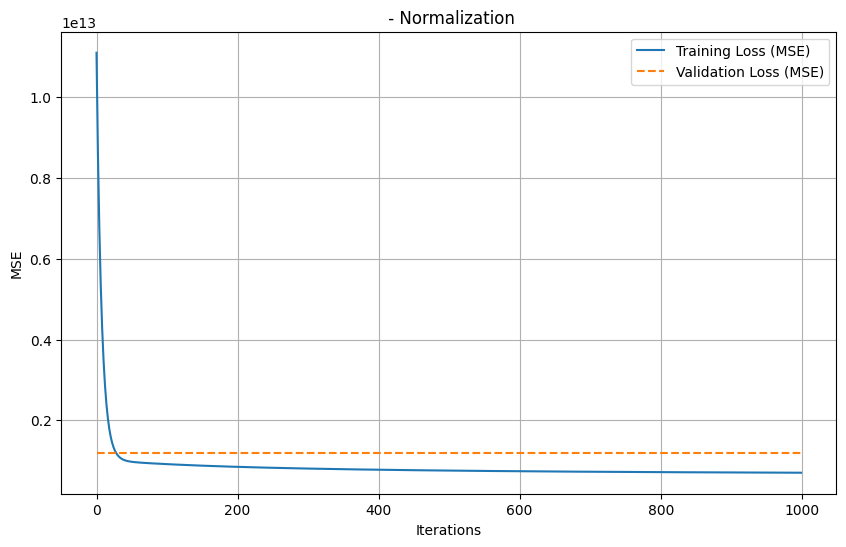

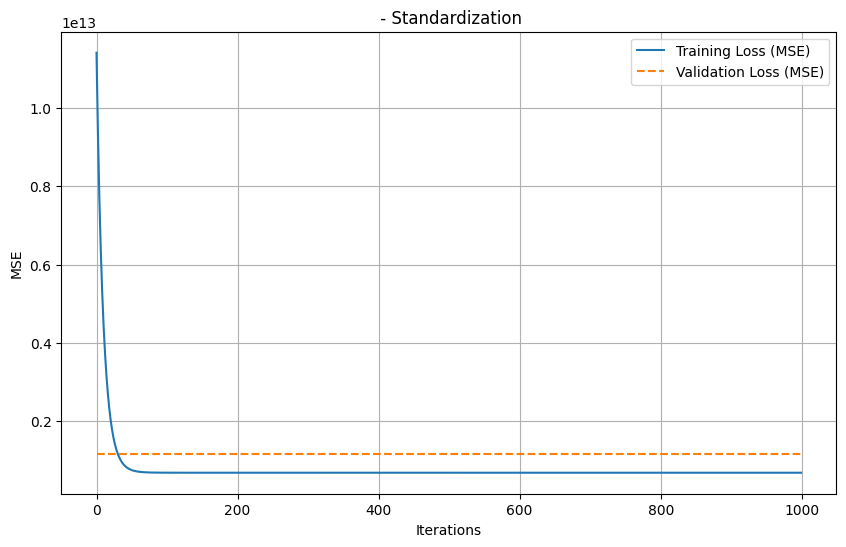

In [ ]:
features_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_2a = data[features_2a].values
y_2a = data['price'].values.reshape(-1, 1)

# Normalization
theta_norm_2a, train_loss_norm_2a = train_with_scaling(X_2a, y_2a, method="normalization")
# Standardization
theta_std_2a, train_loss_std_2a = train_with_scaling(X_2a, y_2a, method="standardization")



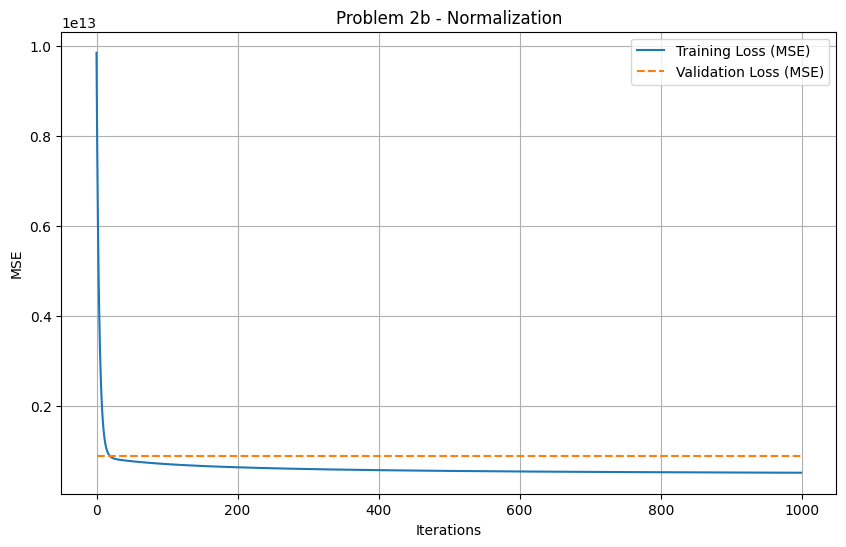

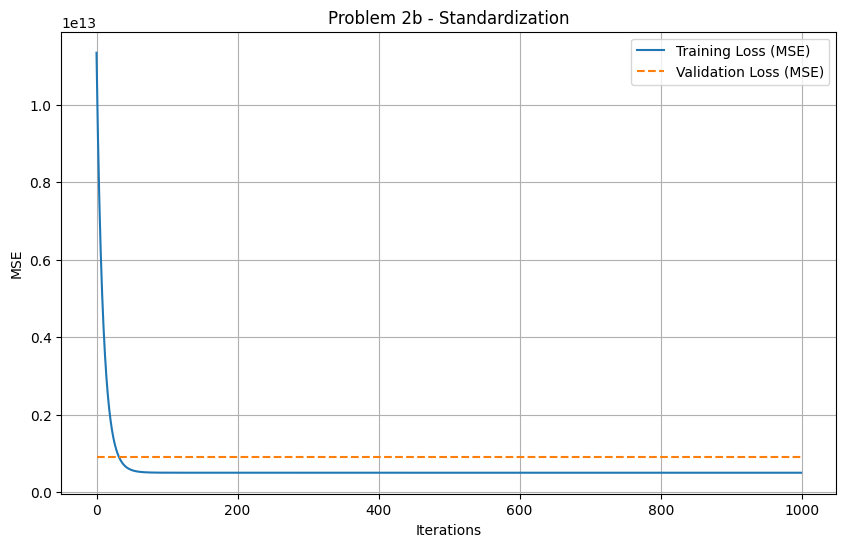

In [ ]:
features_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'parking', 'prefarea']
X_2b = data[features_2b].values
y_2b = data['price'].values.reshape(-1, 1)

# Normalization
theta_norm_2b, train_loss_norm_2b = train_with_scaling(X_2b, y_2b, method="normalization", title="Problem 2b")
# Standardization
theta_std_2b, train_loss_std_2b = train_with_scaling(X_2b, y_2b, method="standardization", title="Problem 2b")

In [ ]:
def gradientDescentRegularized(X, y, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y

        # Exclude theta[0] (bias term) from regularization
        reg_term = np.copy(theta)
        reg_term[0] = 0

        theta -= (alpha / m) * (X.T.dot(errors) + lambda_ * reg_term)
        cost_history[i] = computeCost(X, y, theta)

    return theta, cost_history

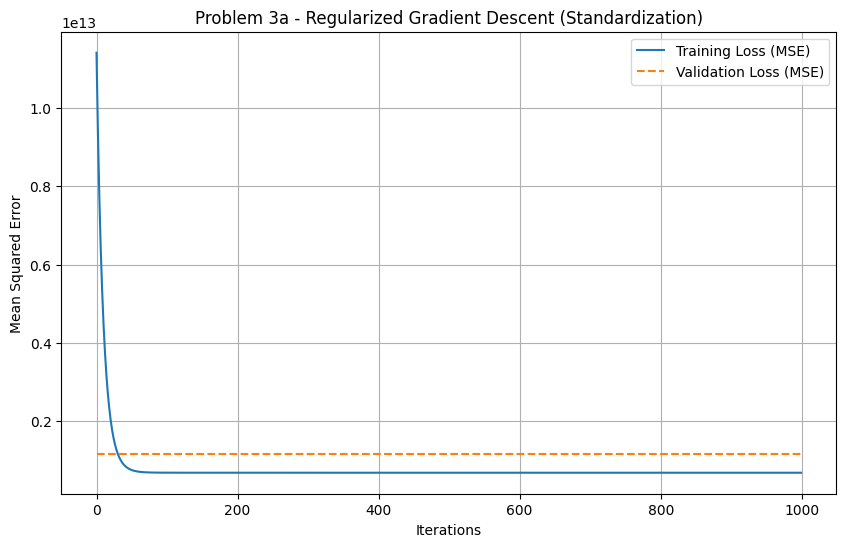

In [ ]:
features_3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_3a = data[features_3a].values
y_3a = data['price'].values.reshape(-1, 1)

# Use standardization
X_train_3a, X_val_3a, y_train_3a, y_val_3a = scale_and_prepare(X_3a, y_3a, method="standardization")
theta_3a = np.zeros((X_train_3a.shape[1], 1))

# Regularization hyperparameter (λ)
lambda_ = 10  # You can try 1, 10, 100

theta_3a, train_loss_3a = gradientDescentRegularized(X_train_3a, y_train_3a, theta_3a, alpha=0.05, iterations=1000, lambda_=lambda_)
val_loss_3a = [computeCost(X_val_3a, y_val_3a, theta_3a)] * 1000

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1000), train_loss_3a, label="Training Loss (MSE)")
plt.plot(range(1000), val_loss_3a, label="Validation Loss (MSE)", linestyle='dashed')
plt.title("Problem 3a - Regularized Gradient Descent (Standardization)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.legend()
plt.show()


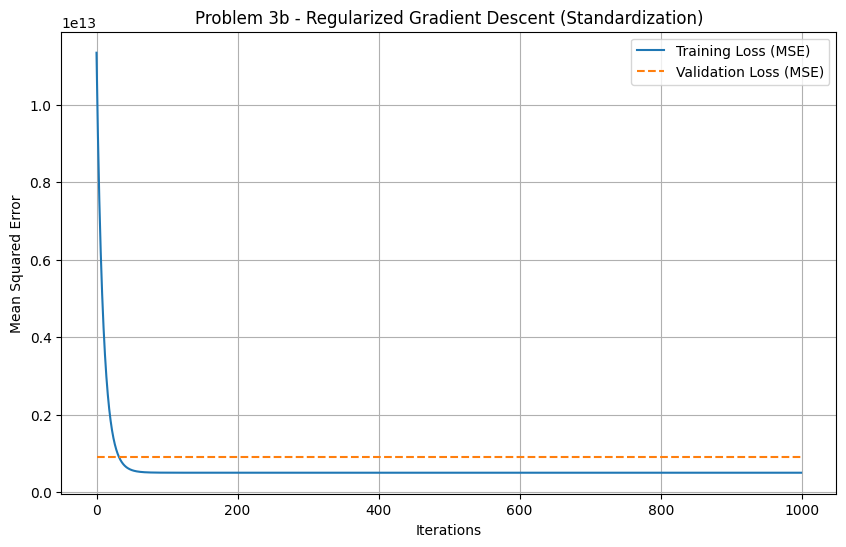

In [ ]:
features_3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'parking', 'prefarea']
X_3b = data[features_3b].values
y_3b = data['price'].values.reshape(-1, 1)

# Use standardization
X_train_3b, X_val_3b, y_train_3b, y_val_3b = scale_and_prepare(X_3b, y_3b, method="standardization")
theta_3b = np.zeros((X_train_3b.shape[1], 1))

lambda_ = 10
theta_3b, train_loss_3b = gradientDescentRegularized(X_train_3b, y_train_3b, theta_3b, alpha=0.05, iterations=1000, lambda_=lambda_)
val_loss_3b = [computeCost(X_val_3b, y_val_3b, theta_3b)] * 1000

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1000), train_loss_3b, label="Training Loss (MSE)")
plt.plot(range(1000), val_loss_3b, label="Validation Loss (MSE)", linestyle='dashed')
plt.title("Problem 3b - Regularized Gradient Descent (Standardization)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.legend()
plt.show()